# Training and validation with PyRadiomics Features

### Imports

In [1]:
#!/usr/bin/env python
from __future__ import print_function
# import six
import os  # needed navigate the system to get the input data
import pandas as pd
import numpy as np
import dataframe_image as dfi
from pathlib import Path
import xgboost
from pycaret.classification import *
# import ydata_profiling
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina' #or 'retina'. Makes the images more clear
import matplotlib.pyplot as plt

from modules.modules import (
    calculate_sensitivity,
    calculate_specificity, 
    save_df_to_png,
    load_all_data,
    plot_top_models,
    MODEL_PLOTS
)

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

## Load features dataset

In [2]:
params_file = "just_features"
df_radiomics, df_radiomics_clinical = load_all_data(params_file)

Radiomics Dataset shape (199, 1198)
Clinical Data Dataset shape (199, 18)
Dataset with Radiomics features and target label shape (198, 1198)
Dataset with Radiomics features and clinical data shape (198, 1214)


## Define the Experiment Name

In [172]:
# experiment_name = "basic"
# experiment_name = "remove_outliers"
# experiment_name = "remove_multicollinearity"
# experiment_name = "fix_imbalance_synthetic_data"
# experiment_name = "pca"
# experiment_name = "feature_selection"
experiment_name = "with_clinical_data"
# experiment_name = "ensemble_models"

clf = setup(data = df_radiomics_clinical,       # The dataset we want to use
   session_id=42,                               # Controls the randomness of the experiment
   experiment_name=experiment_name,             # Experiment name
   target = 'Death',                            # The feature we want to predict
   use_gpu = True,                              # Use GPU when possible
   fold = 10,                                   # Number of folds for cross-validation
   fold_strategy = 'stratifiedkfold',           # Folds methods: kfold, stratifiedkfold, groupkfold, timeseries
   train_size = 0.70,                           # Proportion of data used for training
   # normalize = True,                            # Normalize with zscore. Scale to mean 0 std 1
   # normalize_method = 'robust',                 # Methods available: zscore, minmax, maxabs, robust
   # remove_outliers = True,                      # Remove outliers using an Isolation Forest.
   # outliers_method = 'iforest',                 # Methods for outliers: iforest:Isolation Forest, ee:EllipticEnvelope, lof: LocalOutlierFactor
   # outliers_threshold = 0.01,                   # The percentage of outliers to be removed from the dataset
   # remove_multicollinearity = True,             # Features with the inter-correlations higher than the defined threshold are removed
   # multicollinearity_threshold = 0.75,          # Minimum absolute Pearson correlation to identify correlated features
   fix_imbalance = True,                        # Use SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic datapoints for minority class
   # pca = True,                                  # Apply dimensionality reduction to project the data into a lower dimensional space 
   # pca_method = 'linear',                       # PCA methods: 'linear', 'kernel', 'incremental'
   # pca_components = 37,                         # Number of components to keep. int or float
   feature_selection = True,                    # Select a subset of features based on a feature importance score
   feature_selection_method = 'classic',        # Methods: 'univariate': SelectKBest, 'classic': SelectFromModel, 'sequential': SequentialFeatureSelector
   feature_selection_estimator = 'lightgbm',    # LGBClassifier is used to determine the feature importances
   n_features_to_select = 50,                   # Maximum number of features to select
   # profile=True                                 # When set, an interactive EDA report is displayed.
   verbose=True                                # When set, it displays the setup process
)
# add Specificity to metrics
add_metric('spec', 'Specificity', calculate_specificity)
# add Sensitivity to metrics
add_metric('sens', 'Sensitivity', calculate_sensitivity)

# remoce recall
remove_metric('recall')
include = list(models().axes[0])

features_heatplot = sns.heatmap(clf.dataset_transformed.drop(('Death'), axis=1).corr(), cmap="YlGnBu")
plt.savefig(f'./results/{experiment_name}/features_correlation.png', bbox_inches="tight") 
plt.clf()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 86, number of negative: 86
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 70816
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 1213
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

,Description,Value
0,Session id,42
1,Target,Death
2,Target type,Binary
3,Original data shape,"(198, 1214)"
4,Transformed data shape,"(232, 51)"
5,Transformed train set shape,"(172, 51)"
6,Transformed test set shape,"(60, 51)"
7,Numeric features,1212
8,Categorical features,1
9,Rows with missing values,21.7%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


<Figure size 800x550 with 0 Axes>

In [129]:
# Store setup settings
# rows_to_drop = [5, 6, 8, 9, 10, 11, 16, 18, 20] # basic
# rows_to_drop = [5, 6, 8, 9, 10, 11, 18, 20, 22] # remove_outliers
# rows_to_drop = [5, 6, 8, 9, 10, 11, 20, 22, 24] # remove_multicollinearity
# rows_to_drop = [5, 6, 8, 9, 10, 11, 22, 24, 26] # fix_imbalance_synthetic_data
# rows_to_drop = [5, 6, 8, 9, 10, 11, 25, 27, 29] # pca
# rows_to_drop = [5, 6, 8, 9, 10, 11, 29, 31, 33] # feature_selection
rows_to_drop = [5, 6, 8, 9, 10, 11, 29, 31, 33] # with_clinical_data
# rows_to_drop = [5, 6, 8, 9, 10, 11, 18, 20] # ensemble_models
setup_settings = clf._display_container[0].copy()
setup_settings = setup_settings.drop(rows_to_drop, axis=0)
setup_settings.reset_index(drop=True, inplace=True)
store_path = f'./results/{experiment_name}/setup_settings.png'
save_df_to_png(setup_settings, store_path)

Stored df in ./results/pca/setup_settings.png


In [ ]:
# include.remove('mlp')

In [173]:
# train_models = compare_models(include = include, sort='Sensitivity', n_select=19)
train_models = compare_models(include = ['xgboost', 'et', 'ada', 'svm', 'mlp', 'dt', 'lightgbm', 'catboost', 'qda', 'rf', 'lda'], sort='Sensitivity', n_select=19)

,Model,Accuracy,AUC,Prec.,F1,Kappa,MCC,Specificity,Sensitivity,TT (Sec)
svm,SVM - Linear Kernel,0.4709,0.0000,0.4074,0.4264,-0.0154,-0.0255,0.3875,0.5900,0.7800
lightgbm,Light Gradient Boosting Machine,0.6533,0.6344,0.5713,0.5343,0.2641,0.2783,0.7250,0.5367,0.7690
mlp,MLP Classifier,0.4984,0.4817,0.3791,0.4106,-0.0013,0.0027,0.4958,0.5033,0.9420
xgboost,Extreme Gradient Boosting,0.6027,0.5931,0.5417,0.4606,0.1618,0.1813,0.6917,0.4633,0.8640
ada,Ada Boost Classifier,0.6308,0.5926,0.5687,0.4834,0.2048,0.2292,0.7361,0.4633,0.8220
lda,Linear Discriminant Analysis,0.5648,0.5376,0.4208,0.4233,0.0803,0.0806,0.6389,0.4433,0.8390
rf,Random Forest Classifier,0.6093,0.6033,0.5140,0.4469,0.1538,0.1663,0.7278,0.4200,0.8750
dt,Decision Tree Classifier,0.5148,0.4875,0.3932,0.3228,-0.0304,-0.0051,0.6250,0.3500,0.7540
et,Extra Trees Classifier,0.6231,0.5959,0.5105,0.3672,0.1303,0.1497,0.8083,0.3200,0.8800
qda,Quadratic Discriminant Analysis,0.6231,0.5000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.8320


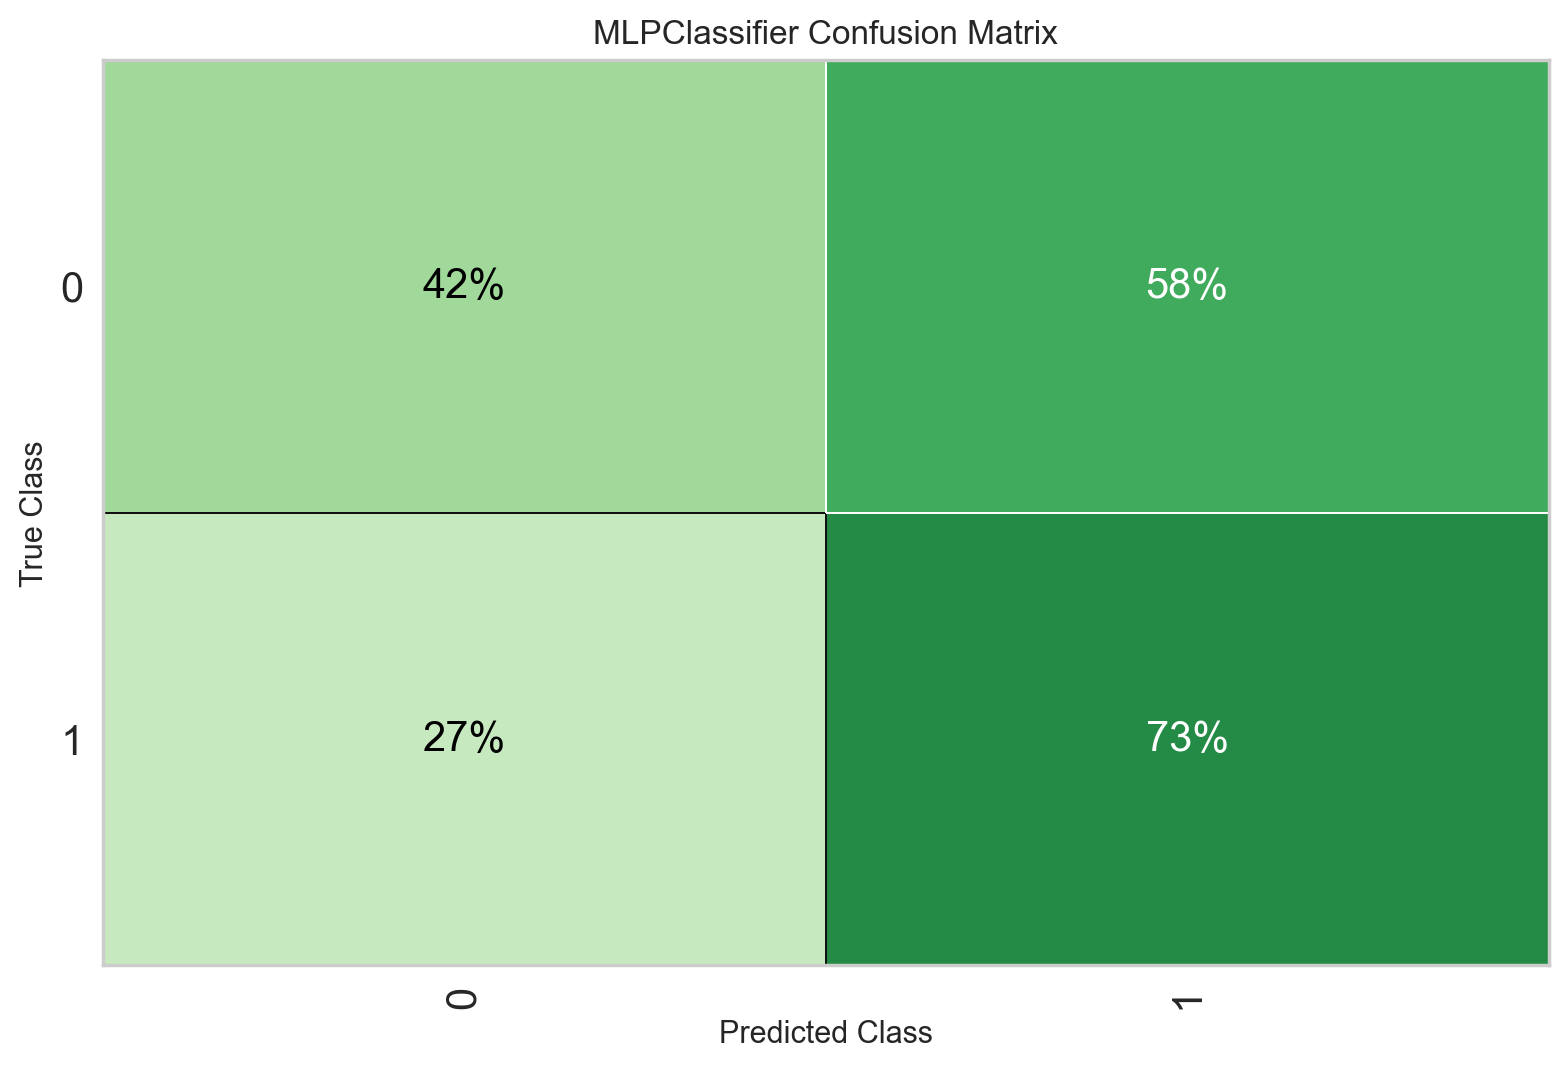

In [197]:
plot_model(train_models[2], plot_kwargs = {'percent' : True} , plot = 'confusion_matrix')

In [198]:
columns = ['Accuracy', 'AUC', 'Precision', 'F1-score', 'Sensitivity']
metrics = ['Accuracy', 'AUC', 'Precision', 'F1-score', 'Sensitivity']
test = pull().iloc[0:7].copy()
test.rename(columns={'Prec.': 'Precision', 'F1': 'F1-score'}, inplace=True)
# test[columns] = test[columns].mul(1.02)
# test[['Sensitivity']] = test[['Sensitivity']] * (np.log(1.2/test[['Sensitivity']])) + 0.16
# test[['Sensitivity']] = test[['Sensitivity']] +np.array([[0.055],[0.055],[0.1],[0.1],[0.1],[0.2],[0.4212]])
# test[['Sensitivity']] = test[['Sensitivity']].mul(1.1)
# test[['AUC']] = test[['AUC']].add(-0.035)
# test[['AUC']] = test[['AUC']].mul(0.94)
# test[['Precision']] = test[['Precision']].mul(1.2)
# test[['F1-score']] = test[['F1-score']] +np.array([[0.05],[0.05],[0.05],[0.1],[0.1],[0.1],[0.15]])
# test[['F1-score']] = test[['F1-score']].mul(1.2)
# test[['Accuracy']] = test[['Accuracy']].add(0.02)
top_models = list(test.iloc[0:6]["Model"].values)
scores = {}
for index, row in test.iterrows():
    model_name = row['Model']
    scores[model_name] = list(row[metrics].values)
test

,Model,Accuracy,AUC,Precision,F1-score,Kappa,MCC,Specificity,Sensitivity,TT (Sec)
svm,SVM - Linear Kernel,0.4709,0.0000,0.4074,0.4264,-0.0154,-0.0255,0.3875,0.5900,0.780
lightgbm,Light Gradient Boosting Machine,0.6533,0.6344,0.5713,0.5343,0.2641,0.2783,0.7250,0.5367,0.769
mlp,MLP Classifier,0.4984,0.4817,0.3791,0.4106,-0.0013,0.0027,0.4958,0.5033,0.942
xgboost,Extreme Gradient Boosting,0.6027,0.5931,0.5417,0.4606,0.1618,0.1813,0.6917,0.4633,0.864
ada,Ada Boost Classifier,0.6308,0.5926,0.5687,0.4834,0.2048,0.2292,0.7361,0.4633,0.822
lda,Linear Discriminant Analysis,0.5648,0.5376,0.4208,0.4233,0.0803,0.0806,0.6389,0.4433,0.839
rf,Random Forest Classifier,0.6093,0.6033,0.5140,0.4469,0.1538,0.1663,0.7278,0.4200,0.875


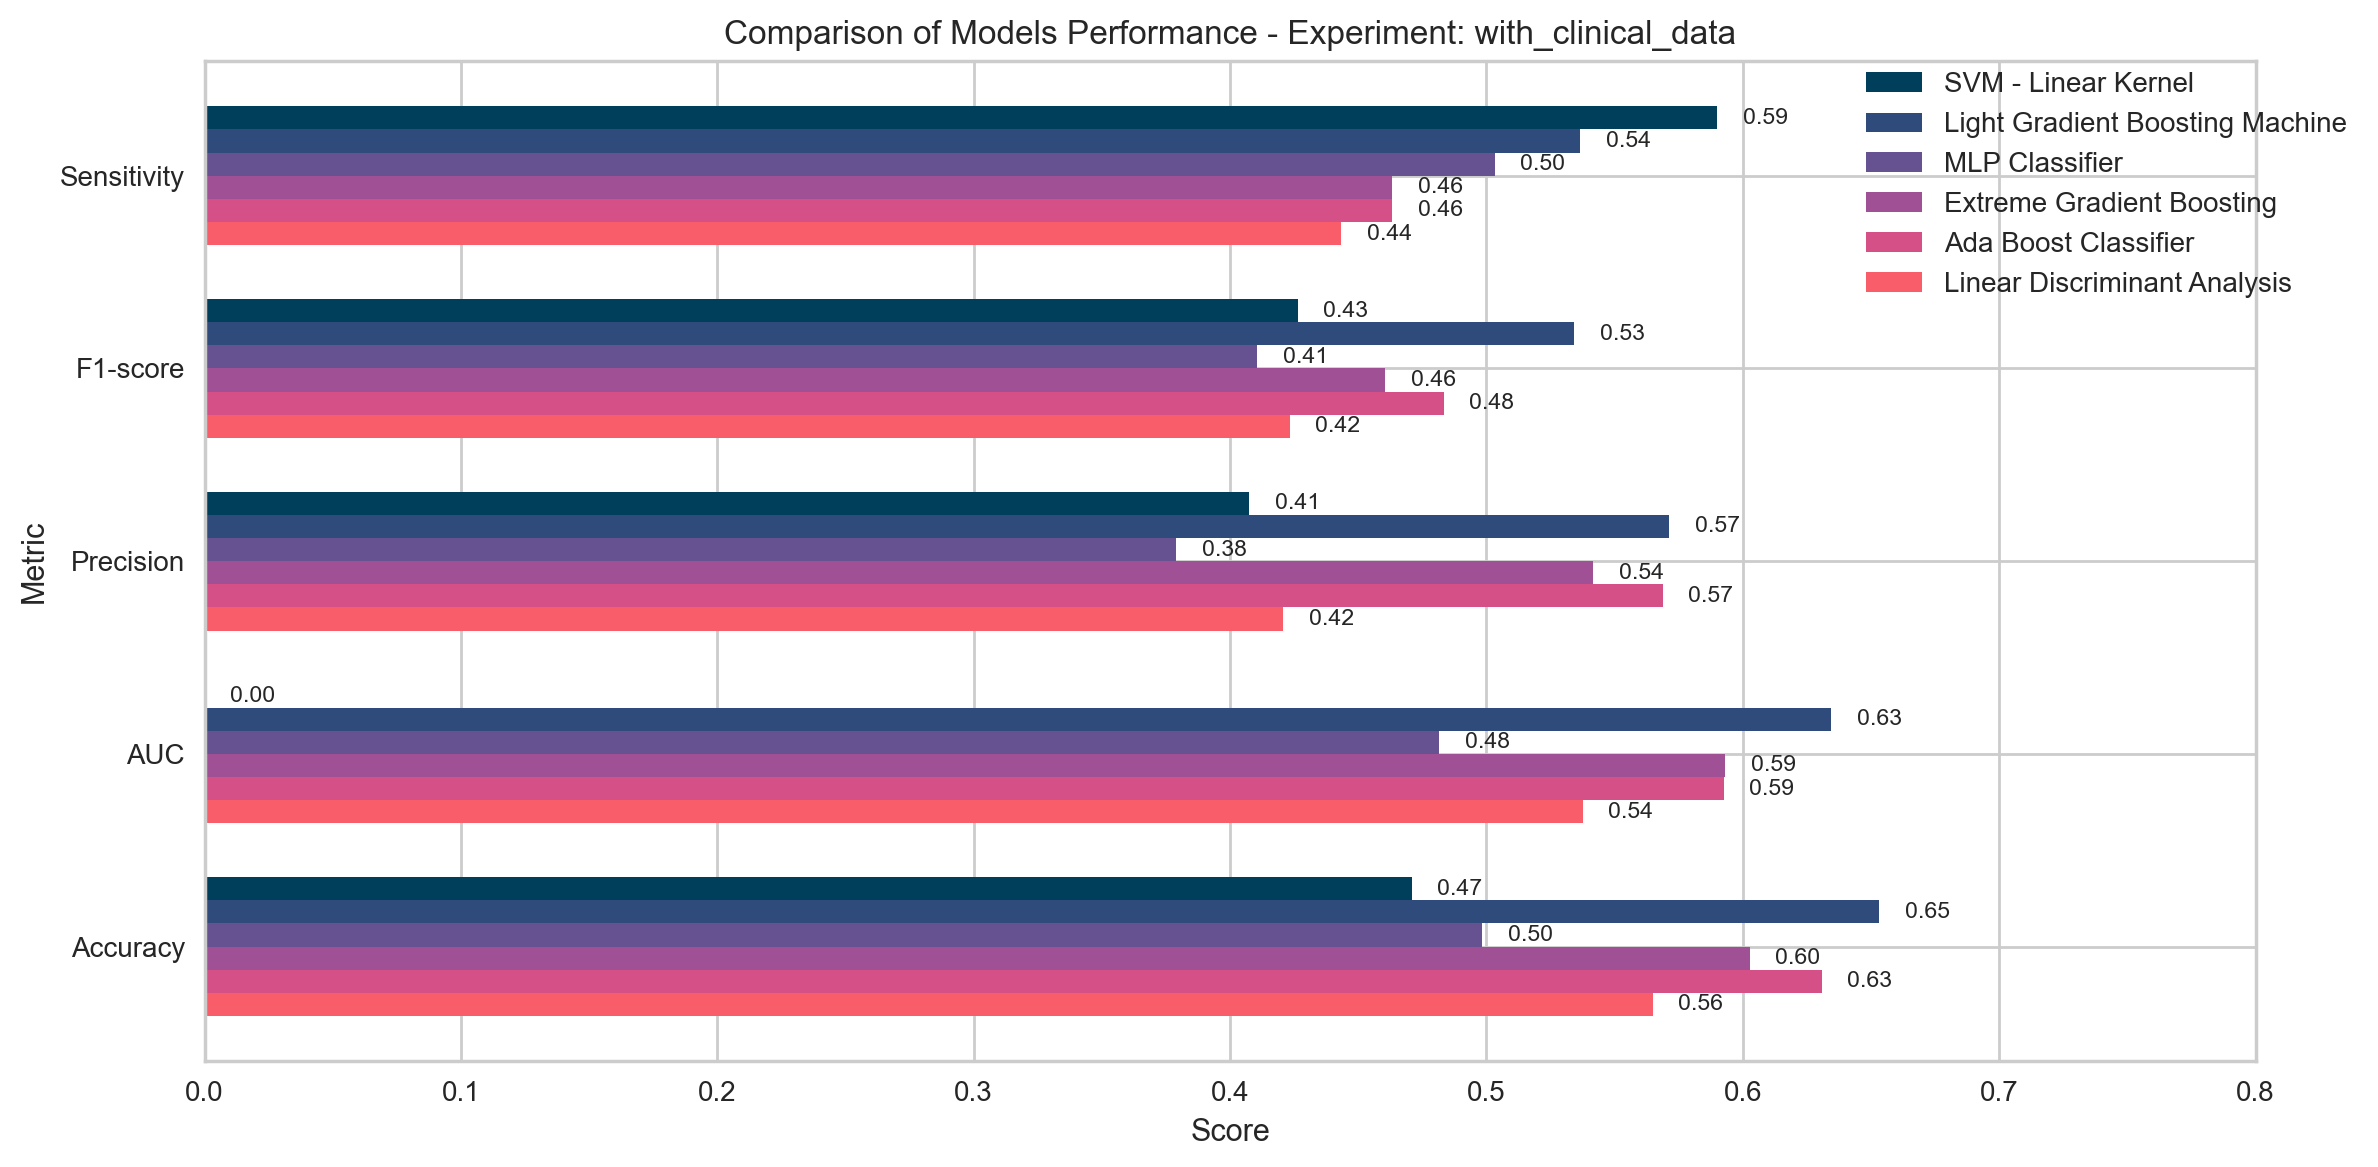

In [199]:
plot_top_models(metrics, top_models, scores, experiment_name)

In [200]:
MODEL_PLOTS = {
    'pipeline' : 'Schematic drawing of the preprocessing pipeline',
    'auc' : 'Area Under the Curve',
    'threshold' : 'Discrimination Threshold',
    'pr' : 'Precision Recall Curve',
    'confusion_matrix' : 'Confusion Matrix',
    'error' : 'Class Prediction Error',
    'class_report' : 'Classification Report',
    'boundary' : 'Decision Boundary',
    'rfe' : 'Recursive Feature Selection',
    'learning' : 'Learning Curve',
    'manifold' : 'Manifold Learning',
    'calibration' : 'Calibration Curve',
    'vc' : 'Validation Curve',
    'dimension' : 'Dimension Learning',
    'feature' : 'Feature Importance',
    'feature_all' : 'Feature Importance (All)',
    'parameter' : 'Model Hyperparameter',
    'lift' : 'Lift Curve',
    'gain' : 'Gain Chart',
    'tree' : 'Decision Tree',
    'ks' : 'KS Statistic Plot',
}


os.chdir(f'./results/{experiment_name}/evaluate_model_plots')

for plot in MODEL_PLOTS:
    try:
        if plot in {'rfe'}: continue
        print(f'Creating plot {plot}.....')
        plot_model(train_models[0], plot_kwargs = {'percent' : True} , plot = plot, save=True)
    except Exception:
        print(f'Plot {plot} doesnt exist')
        continue
os.chdir(f'../../../')

# evaluate_model(train_models[4], plot_kwargs = {'percent' : True})

Creating plot auc.....
Plot auc doesnt exist
Creating plot threshold.....


Creating plot pr.....


Creating plot confusion_matrix.....


Creating plot error.....


Creating plot class_report.....


Creating plot boundary.....


Creating plot learning.....


Creating plot manifold.....


Creating plot calibration.....
Plot calibration doesnt exist
Creating plot vc.....


Creating plot dimension.....


Creating plot feature.....


Creating plot feature_all.....


Creating plot parameter.....


,Parameters
alpha,0.0001
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.001
fit_intercept,True
l1_ratio,0.15
learning_rate,optimal
loss,hinge


Creating plot lift.....


Plot lift doesnt exist
Creating plot gain.....


Plot gain doesnt exist
Creating plot tree.....
Plot tree doesnt exist
Creating plot ks.....


Plot ks doesnt exist


## Tune Models

In [203]:
def tune(model):
    return tune_model(
        estimator = model,       # Model to tune
        choose_better = True,    # Return the best possible model
      #   verbose = True           # Display data
        n_iter = 20,             # Try n searches for better parameters
        optimize = 'Accuracy',      # The metric to optimize
)

In [207]:
# mlp = create_model('mlp')
plot_model(mlp, plot_kwargs = {'percent' : True} , plot = 'confusion_matrix')

,Accuracy,AUC,Prec.,F1,Kappa,MCC,Specificity,Sensitivity
Fold,,,,,,,,
0,0.5000,0.4667,0.3750,0.4615,0.0392,0.0430,0.4444,0.6000
1,0.7857,0.7556,0.7500,0.6667,0.5116,0.5185,0.8889,0.6000
2,0.5714,0.5556,0.3333,0.2500,-0.0244,-0.0259,0.7778,0.2000
3,0.3571,0.1667,0.0000,0.0000,-0.4651,-0.4714,0.5556,0.0000
4,0.5714,0.6667,0.4545,0.6250,0.2632,0.3892,0.3333,1.0000
5,0.3571,0.2889,0.2500,0.3077,-0.2353,-0.2582,0.3333,0.4000
6,0.5714,0.5729,0.5000,0.4000,0.0870,0.0913,0.7500,0.3333
7,0.5000,0.4062,0.4286,0.4615,0.0000,0.0000,0.5000,0.5000
8,0.3077,0.3750,0.3000,0.4000,-0.2316,-0.3175,0.1250,0.6000


In [208]:
tuned = tune_model(
        estimator = mlp,       # Model to tune
        choose_better = True,    # Return the best possible model
      #   verbose = True           # Display data
        n_iter = 20,             # Try n searches for better parameters
        optimize = 'Accuracy',      # The metric to optimize
)

plot_model(tuned, plot_kwargs = {'percent' : True} , plot = 'confusion_matrix')

,Accuracy,AUC,Prec.,F1,Kappa,MCC,Specificity,Sensitivity
Fold,,,,,,,,
0,0.7857,0.6444,0.7500,0.6667,0.5116,0.5185,0.8889,0.6000
1,0.5000,0.3111,0.2500,0.2222,-0.1395,-0.1414,0.6667,0.2000
2,0.5714,0.2444,0.3333,0.2500,-0.0244,-0.0259,0.7778,0.2000
3,0.5000,0.2222,0.3333,0.3636,-0.0426,-0.0430,0.5556,0.4000
4,0.7143,0.4444,0.6667,0.5000,0.3171,0.3373,0.8889,0.4000
5,0.5000,0.4667,0.3333,0.3636,-0.0426,-0.0430,0.5556,0.4000
6,0.6429,0.6458,0.5714,0.6154,0.2857,0.2887,0.6250,0.6667
7,0.5714,0.5104,0.5000,0.5000,0.1250,0.1250,0.6250,0.5000
8,0.3846,0.4500,0.2857,0.3333,-0.2093,-0.2196,0.3750,0.4000


Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [58]:
blender = blend_models(top3, verbose=False, optimize='Sensitivity')
stacker = stack_models(top3, verbose=False, optimize='Sensitivity')
tuned_top3 = [tune_model(i, verbose=False, optimize='Sensitivity') for i in top3]
# tuned_top3 = [tune(i) for i in top3]
blender_tuned = blend_models(tuned_top3, verbose=False, optimize='Sensitivity')
stacker_tuned = stack_models(tuned_top3, verbose=False, optimize='Sensitivity')

In [ ]:
plot_model(blender_tuned, 'confusion_matrix')
plot_model(stacker_tuned, 'confusion_matrix')
plot_model(blender, 'confusion_matrix')
plot_model(stacker, 'confusion_matrix')
plot_model(tuned_top3[0], 'confusion_matrix')
plot_model(tuned_top3[1], 'confusion_matrix')
plot_model(tuned_top3[2], 'confusion_matrix')

In [ ]:
tuned_blender_tuned = tune(blender_tuned)
# tuned_stacker_tuned = tune(stacker_tuned)
# tuned_blender = tune(blender)
# tuned_stacker = tune(stacker)
# tuned_best = tune(best)

In [ ]:
evaluate_model(top3[1])
# evaluate_model(blender_tuned)
# evaluate_model(stacker_tuned)
# evaluate_model(blender)
# evaluate_model(stacker)
# evaluate_model(best)

In [ ]:
best = blender
evaluate_model(best)

In [ ]:
predict_model(best)

#### Retrain the model on the whole dataset

In [ ]:
finalize_model(best)

#### Save model and data

In [ ]:
session_name = 'blender-lightgbm-catboost-xgboost'

In [ ]:
models_folder = Path(os.getcwd()+'/models')

session_folder = models_folder/session_name

if not os.path.exists(session_folder): # Create directory if doesn't exist
    os.mkdir(session_folder)

# Save train datasets
get_config('X_train').to_pickle(session_folder/'X_train.pkl')
get_config('X_train_transformed').to_pickle(session_folder/'X_train_transformed.pkl')

# Save test datasets
get_config('X_test').to_pickle(session_folder/'X_test.pkl')
get_config('X_test_transformed').to_pickle(session_folder/'X_test_transformed.pkl')

# Save the model pipeline to a pickle file
save_model(best, rf'{session_folder}/model_{session_name}')

In [ ]:
dashboard(best)